
# ---> MODELO DE PROPENSION DE COMPRA <---

# 1. CARGA DE DATOS

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("DS_Compra.csv")

In [4]:
# Revición Inicial
data.head()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


In [5]:
data.tail()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
395,10396,F,46.0,3400,C,1
396,10397,M,51.0,1900,S,1
397,10398,F,50.0,1600,S,1
398,10399,M,36.0,2700,C,0
399,10400,F,49.0,3000,C,1


In [6]:
data.shape

(400, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           400 non-null    int64  
 1   SEXO         400 non-null    object 
 2   EDAD         387 non-null    float64
 3   INGRESOS     400 non-null    int64  
 4   ESTADOCIVIL  392 non-null    object 
 5   FLAG_COMPRA  400 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ KB


In [8]:
# Obtenere tipos de datos
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64


# 2. ANÁLISIS DESCRIPTIVO DE LOS DATOS

In [9]:
data.describe(include = 'all')

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
count,400.000000,400,387.000000,400.000000,392,400.000000
unique,NaN,2,NaN,NaN,3,NaN
top,NaN,F,NaN,NaN,S,NaN
freq,NaN,204,NaN,NaN,214,NaN
mean,10200.500000,NaN,37.589147,6476.500000,NaN,0.357500
std,115.614301,NaN,10.523312,7705.031897,NaN,0.479864
min,10001.000000,NaN,18.000000,1200.000000,NaN,0.000000
25%,10100.750000,NaN,29.000000,3500.000000,NaN,0.000000
50%,10200.500000,NaN,37.000000,5800.000000,NaN,0.000000
75%,10300.250000,NaN,46.000000,7300.000000,NaN,1.000000


In [10]:
# Frecuencias de estado civil
data["ESTADOCIVIL"].value_counts()

S    214
C    125
D     53
Name: ESTADOCIVIL, dtype: int64

In [11]:
# Frecuencias relativas de estado civil
data["ESTADOCIVIL"].value_counts(normalize = True, dropna = False) 
# normalize: para frecuenciaas relativas 
# dropna: eliminar nulos

S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64

In [12]:
# Edad
data["EDAD"].value_counts(bins = 5 , normalize = True)
# bins: nro de rangos a agrupar
# normalize: para frecuenciaas relativas 

(34.8, 43.2]                  0.3450
(26.4, 34.8]                  0.1900
(17.956999999999997, 26.4]    0.1625
(43.2, 51.6]                  0.1600
(51.6, 60.0]                  0.1100
Name: EDAD, dtype: float64

In [13]:
# Generar rangos según nuestross límites deseados:
def genera_rangos(valor):
    if pd.isnull(valor):
        return("Nuloooooooo")
    elif valor <= 30 :
        return("[18-30]")
    elif valor <= 50 :
        return("(30-50]")
    elif valor <= 60 :
        return("(50-60]")
    else:
        return('Nan')
genera_rangos(35)

'(30-50]'

In [14]:
data["EDAD_RANGO"] = data["EDAD"].apply(lambda x: genera_rangos(x))

In [15]:
data["EDAD_RANGO"].value_counts(normalize = True)

(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64

In [16]:
pd.DataFrame(data.dtypes)

,0
ID,int64
SEXO,object
EDAD,float64
INGRESOS,int64
ESTADOCIVIL,object
FLAG_COMPRA,int64
EDAD_RANGO,object


In [17]:
# Ver solo las columnas del dataframe:
data.columns.values

array(['ID', 'SEXO', 'EDAD', 'INGRESOS', 'ESTADOCIVIL', 'FLAG_COMPRA',
       'EDAD_RANGO'], dtype=object)

In [18]:
# Seleccionar variables categoricas (object)
vars_str = data.select_dtypes(include = ['object']).columns.values

In [19]:
for feature in vars_str:
    print("---------------------------------------------")
    print(data[feature].value_counts(normalize = True, dropna = False) )

---------------------------------------------
F    0.51
M    0.49
Name: SEXO, dtype: float64
---------------------------------------------
S      0.5350
C      0.3125
D      0.1325
NaN    0.0200
Name: ESTADOCIVIL, dtype: float64
---------------------------------------------
(30-50]        0.5775
[18-30]        0.2725
(50-60]        0.1175
Nuloooooooo    0.0325
Name: EDAD_RANGO, dtype: float64


In [20]:
# Concatenar dataframes
pd.concat([data,data], axis = 1)  # axis = 0: concatena por filas, axis = 1: concatena por columnnas

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30],10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50],10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30],10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30],10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30],10005,M,19.0,6300,S,0,[18-30]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,10396,F,46.0,3400,C,1,(30-50],10396,F,46.0,3400,C,1,(30-50]
396,10397,M,51.0,1900,S,1,(50-60],10397,M,51.0,1900,S,1,(50-60]
397,10398,F,50.0,1600,S,1,(30-50],10398,F,50.0,1600,S,1,(30-50]
398,10399,M,36.0,2700,C,0,(30-50],10399,M,36.0,2700,C,0,(30-50]


In [21]:
df1 = pd.DataFrame(data["ESTADOCIVIL"].value_counts())
df1 = df1.rename(columns = {'ESTADOCIVIL' : "FREC_ABS"})
df1.head()

,FREC_ABS
S,214
C,125
D,53


In [22]:
df2 = pd.DataFrame(data["ESTADOCIVIL"].value_counts(normalize = True))
df2 = df2.rename(columns = {'ESTADOCIVIL' : "FREC_REL"})
df2.head()

,FREC_REL
S,0.545918
C,0.318878
D,0.135204


In [23]:
df3 = pd.DataFrame(data.groupby(by=['ESTADOCIVIL'], as_index = False )['FLAG_COMPRA'].mean())
df3.head()

,ESTADOCIVIL,FLAG_COMPRA
0,C,0.248000
1,D,0.245283
2,S,0.448598


In [26]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['FLAG_COMPRA'], 
                 values = ['ID'],
                 aggfunc = 'count')       

ID    
FLAG_COMPRA    0   1
ESTADOCIVIL         
C             94  31
D             40  13
S            118  96

In [27]:
data.pivot_table(index = ['ESTADOCIVIL'] , 
                 columns = ['SEXO'], 
                 values = ['FLAG_COMPRA'], 
                 aggfunc = 'mean')       

FLAG_COMPRA          
SEXO                  F         M
ESTADOCIVIL                      
C              0.258065  0.238095
D              0.275862  0.208333
S              0.481481  0.415094

# 3. PREPROCESAMIENTO DE DATOS

## 3.1 Tratamiento de Valores Nulos

In [28]:
data.isnull().sum()

ID              0
SEXO            0
EDAD           13
INGRESOS        0
ESTADOCIVIL     8
FLAG_COMPRA     0
EDAD_RANGO      0
dtype: int64

In [29]:
#### Imputar valores missing
data["EDAD"].fillna(data["EDAD"].median(), inplace = True)
data["ESTADOCIVIL"].fillna(data["ESTADOCIVIL"].mode()[0], inplace = True)

In [30]:
data.isnull().sum()

ID             0
SEXO           0
EDAD           0
INGRESOS       0
ESTADOCIVIL    0
FLAG_COMPRA    0
EDAD_RANGO     0
dtype: int64

## 3.2 Tratamiento de Outliers

In [31]:
# Percetiles 
np.nanpercentile(data['EDAD'], [0,1,5,10,50,75,90,95, 99,100])

array([18., 18., 21., 24., 37., 45., 52., 57., 60., 60.])

In [32]:
# Calcular Percentile 90
np.nanpercentile(data['EDAD'], [90])[0]

52.0

In [33]:
# Identificar registros con edad mayor al percentile 90
indices_percmayor90 = data['EDAD'] > np.nanpercentile(data['EDAD'], [90])[0]

In [34]:
# "Topeamos" (reemplazo esos valores por un valor tope (perc 90))
data.loc[indices_percmayor90, "EDAD"] = 52

In [35]:
max(data.EDAD)

52.0

## 3.2 Conversion de Variables

In [36]:
df = data.copy()

In [37]:
df.head(10)

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA,EDAD_RANGO
0,10001,M,19.0,1500,S,0,[18-30]
1,10002,M,35.0,1600,C,0,(30-50]
2,10003,F,26.0,3500,C,0,[18-30]
3,10004,F,27.0,4700,C,0,[18-30]
4,10005,M,19.0,6300,S,0,[18-30]
5,10006,M,27.0,4800,C,0,[18-30]
6,10007,F,27.0,7000,C,0,[18-30]
7,10008,F,32.0,80000,C,1,(30-50]
8,10009,M,25.0,2700,C,0,[18-30]
9,10010,F,37.0,5400,C,0,Nuloooooooo


In [38]:
# SEXO -- Variable Dummy
dicc_sexo = {'M': 1,
             'F': 0}
df['SEXO'] = df['SEXO'].map(dicc_sexo)

In [39]:
# ESTADOCIVIL
df_ec_dummies = pd.get_dummies(df["ESTADOCIVIL"], prefix = 'ESTADOCIVIL')#, drop_first = True)

In [40]:
del df["ESTADOCIVIL"]

In [41]:
df = pd.concat([df,df_ec_dummies], axis = 1)

In [42]:
df.head()

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,[18-30],0,0,1
1,10002,1,35.0,1600,0,(30-50],1,0,0
2,10003,0,26.0,3500,0,[18-30],1,0,0
3,10004,0,27.0,4700,0,[18-30],1,0,0
4,10005,1,19.0,6300,0,[18-30],0,0,1


In [43]:
# EDAD_RANGO
df.EDAD_RANGO.unique()

array(['[18-30]', '(30-50]', 'Nuloooooooo', '(50-60]'], dtype=object)

In [44]:
dicc_rangoEdad = {'[18-30]': 0,
             '(30-50]': 1,
             '(50-60]': 2,
             'Nuloooooooo' : 9}
df['EDAD_RANGO'] = df['EDAD_RANGO'].map(dicc_rangoEdad)

In [45]:
df

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500,0,0,0,0,1
1,10002,1,35.0,1600,0,1,1,0,0
2,10003,0,26.0,3500,0,0,1,0,0
3,10004,0,27.0,4700,0,0,1,0,0
4,10005,1,19.0,6300,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
395,10396,0,46.0,3400,1,1,1,0,0
396,10397,1,51.0,1900,1,2,0,0,1
397,10398,0,50.0,1600,1,1,0,0,1
398,10399,1,36.0,2700,0,1,1,0,0


## 3.3 Preselección de Variables

In [46]:
list(df.columns)

['ID',
 'SEXO',
 'EDAD',
 'INGRESOS',
 'FLAG_COMPRA',
 'EDAD_RANGO',
 'ESTADOCIVIL_C',
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [47]:
features_to_model = ['SEXO',
 'EDAD',
 'INGRESOS',
 'EDAD_RANGO',
 'ESTADOCIVIL_C',                     
 'ESTADOCIVIL_D',
 'ESTADOCIVIL_S']

In [48]:
X_data = df[features_to_model]
X_data.head()

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,1,19.0,1500,0,0,0,1
1,1,35.0,1600,1,1,0,0
2,0,26.0,3500,0,1,0,0
3,0,27.0,4700,0,1,0,0
4,1,19.0,6300,0,0,0,1


In [49]:
y_data = df['FLAG_COMPRA']

In [52]:
# Separar Data de Training y data de Test
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    train_size = 0.60, 
                                                    random_state = 20)

# Scaling

In [54]:
X_train.head(3)

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
220,0,41.0,6600,1,0,1,0
39,0,27.0,2500,0,1,0,0
58,1,22.0,1500,0,0,0,1


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train_scaler = scaler.transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns)
X_train_scaler.head(3)

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,-0.975305,0.399869,0.073862,-0.070684,-0.67420,2.751623,-1.153298
1,-0.975305,-1.034025,-0.685593,-0.698984,1.48324,-0.363422,-1.153298
2,1.025320,-1.546130,-0.870825,-0.698984,-0.67420,-0.363422,0.867078


In [57]:
X_test_scaler = scaler.transform(X_test)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test.columns)
X_test_scaler.head(3)

,SEXO,EDAD,INGRESOS,EDAD_RANGO,ESTADOCIVIL_C,ESTADOCIVIL_D,ESTADOCIVIL_S
0,-0.975305,-1.136446,0.073862,-0.698984,-0.67420,-0.363422,0.867078
1,-0.975305,0.707132,0.981502,-0.070684,1.48324,-0.363422,-1.153298
2,-0.975305,-0.009815,0.073862,-0.070684,1.48324,-0.363422,-1.153298


In [58]:
X_train = X_train_scaler.copy()
X_test = X_test_scaler.copy()

# 4. MODELAMIENTO

In [59]:
def print_mc(matriz_conf):
    matriz_conf = pd.DataFrame(matriz_conf)
    matriz_conf.index = ["Real_0","Real_1"]
    matriz_conf.columns = ["Pred_0","Pred_1"]
    print(matriz_conf)

In [71]:
################################## CURVA ROC ###############################
def graficar_roc(y_test,y_pred_proba):
    import matplotlib.pyplot as plt
    from sklearn import metrics as mt

    fpr, tpr, thresholds  = mt.roc_curve(y_test.astype('int'),y_pred_proba[:,1], pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.4f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

### 4.1 REGRESION LOGISTICA

### 4.1.1 Entrenamiento y Predicción

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
# Crear objeto modelo (Instanciar)
model_regl = LogisticRegression()

In [74]:
# Entrenar (ajustar) el modelo:
model = model_regl.fit(X_train,y_train)

In [75]:
# Generar las predicciones:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Generar las probabilidades
pred_proba_train = model.predict_proba(X_train)
pred_proba_test = model.predict_proba(X_test)

### 4.1.2 Evaluación del Modelo

In [76]:
from sklearn import metrics as mt

In [77]:
# Sobre el Training Data
print("Metricas del Training...")

Metricas del Training...


In [78]:
matriz_conf = mt.confusion_matrix(y_train,pred_train)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0     151       9
Real_1      22      58


In [79]:
accuracy_train = mt.accuracy_score(y_train,pred_train)
print("Accuracy - Train:", accuracy_train) # 0.845833333333

Accuracy - Train: 0.8708333333333333


In [80]:
print(mt.classification_report(y_train,pred_train,digits = 3))

              precision    recall  f1-score   support

           0      0.873     0.944     0.907       160
           1      0.866     0.725     0.789        80

    accuracy                          0.871       240
   macro avg      0.869     0.834     0.848       240
weighted avg      0.870     0.871     0.868       240



ROC AUC: 0.9210


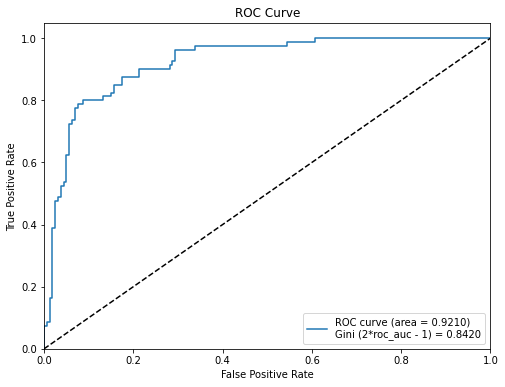

In [81]:
graficar_roc(y_train,pred_proba_train) # 0.9170

In [82]:
# Sobre el testing Data
print("Metricas del testing...")

Metricas del testing...


In [83]:
matriz_conf = mt.confusion_matrix(y_test,pred_test)
print_mc(matriz_conf)

        Pred_0  Pred_1
Real_0      96       1
Real_1      22      41


In [84]:
accuracy_test = mt.accuracy_score(y_test,pred_test)
print("Accuracy - test:", accuracy_test) # 0.8375

Accuracy - test: 0.85625


In [85]:
print(mt.classification_report(y_test,pred_test,digits = 3))

              precision    recall  f1-score   support

           0      0.814     0.990     0.893        97
           1      0.976     0.651     0.781        63

    accuracy                          0.856       160
   macro avg      0.895     0.820     0.837       160
weighted avg      0.878     0.856     0.849       160



ROC AUC: 0.9514


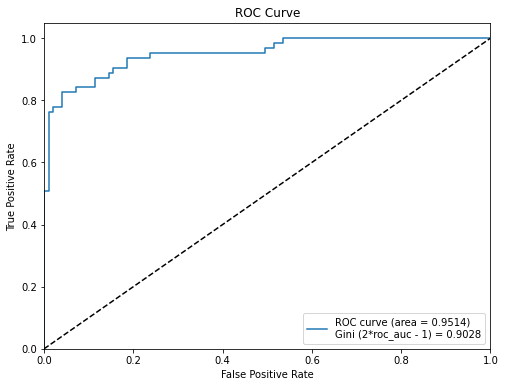

In [86]:
graficar_roc(y_test,pred_proba_test) # 0.9514